In [1]:
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import shapely
import matplotlib.pyplot as plt

import functions as fun

import warnings
warnings.simplefilter("ignore")

# Carta risorse idriche
Source: https://www.provincia.tn.it/Documenti-e-dati/Documenti-di-supporto/Download-shapefile-Carta-delle-Risorse-idriche

In [ ]:
cri_url = 'https://www.provincia.tn.it/content/download/97556/1838192/file/CRI_shapefile.zip'
cri_path = '../data/water/carta_ris_idriche/'
fun.download_and_unzip_shapefile(cri_url, extract_to=cri_path)

Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/


Contains several zip folders with shapefiles for the different types of resources (listed in **leggi.txt**).
I start from looking at PUP_AS (acque superficiali), PUP_SO (sorgenti), PUP_PO (pozzi).

In [19]:
os.listdir(cri_path)

['pup_as',
 'pup_so.zip',
 'pup_si.zip',
 'pup_asu.zip',
 'pup_sor.zip',
 'pup_pp.zip',
 'pup_ai.zip',
 'pup_ap.zip',
 'pup_poz.zip',
 'pup_as.zip',
 'pup_sp.zip',
 'pup_pi.zip',
 'pup_po.zip',
 'leggi.txt']

In [ ]:
for zip in ['pup_as.zip', 'pup_so.zip', 'pup_po.zip']:
    path = cri_path + zip
    dest = cri_path + zip.split('.')[0] + '/' 
    fun.download_and_unzip_shapefile(path, dest, download=False)

Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_as/
Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_so/
Downloaded and extracted shapefile in ../data/water/carta_ris_idriche/pup_po/


In [2]:
# Acque superficiali
pup_as = gpd.read_file('../data/water/carta_ris_idriche/pup_as/pup_as.shp')
pup_as.head(5)


,CODAS,DENOMINAZI,X_COORD,Y_COORD,geometry
0,Q143001,LAGO SERODOLI,637235.7659,5.123018e+06,POINT (637235.766 5123018.104)
1,Q920002,RIO MASSO' O VAL DELLE SEGHE (ALTA 1),649043.4944,5.115833e+06,POINT (649043.494 5115833.139)
2,Q009001,RIO DI BRUSAGO,681664.9133,5.116879e+06,POINT (681664.913 5116878.856)
3,Q920003,RIO MASSO' O VAL DELLE SEGHE (ALTA 2),649088.3931,5.115788e+06,POINT (649088.393 5115788.227)
4,Q920001,RIO MASSO' O VAL DELLE SEGHE (BASSA),648393.3936,5.115261e+06,POINT (648393.394 5115261.294)


In [3]:
# Sorgenti
pup_so = gpd.read_file('../data/water/carta_ris_idriche/pup_so/pup_so.shp')
pup_so.head(5)

,CODSOR,COORD_X,COORD_Y,geometry
0,3218.0,725912.00,5119184.0,POINT (725912.000 5119184.000)
1,3219.0,725993.00,5119248.0,POINT (725993.000 5119248.000)
2,628.0,671334.00,5107963.0,POINT (671334.000 5107963.000)
3,629.0,671402.03,5108045.1,POINT (671402.030 5108045.100)
4,630.0,671427.03,5108021.1,POINT (671427.030 5108021.100)


In [4]:
# Pozzi
pup_po = gpd.read_file('../data/water/carta_ris_idriche/pup_po/pup_po.shp')
pup_po.head(5)

,PCOD,DENOMINAZI,X_COORD,Y_COORD,geometry
0,6766,OSPEDALETTO,697149.0,5102200.0,POINT (697149.000 5102200.000)
1,20555,SERVIS,659744.0,5089931.0,POINT (659744.000 5089931.000)
2,4880,LOCALITA' POZZE,653277.0,5086286.0,POINT (653277.000 5086286.000)
3,199,BOSCO,667621.0,5108673.0,POINT (667621.000 5108673.000)
4,23294,FONTANELLE,679381.0,5096489.0,POINT (679381.000 5096489.000)


In [36]:
print('Number of features in Acque Superficiali:', len(pup_as))
print('Number of features in Sorgenti:', len(pup_so))
print('Number of features in Pozzi:', len(pup_po))

Number of features in Acque Superficiali: 32
Number of features in Sorgenti: 1871
Number of features in Pozzi: 153


Store them in a single gdf, adding a column 'type' to differentiate them

In [5]:
# Standardize the column names and add 'type' column
pup_as = pup_as.rename(columns={'CODAS': 'id_code', 'DENOMINAZI': 'name'})
pup_as['type'] = 'acqua_superficiale'

pup_so = pup_so.rename(columns={'CODSOR': 'id_code'})
pup_so['type'] = 'sorgente'

pup_po = pup_po.rename(columns={'PCOD': 'id_code', 'DENOMINAZI': 'name'})
pup_po['type'] = 'pozzo'

# Concatenate 
pup_all = gpd.GeoDataFrame(pd.concat([pup_as, pup_so, pup_po], ignore_index=True))
pup_all = pup_all[['id_code', 'type', 'name', 'geometry' ]]

pup_all.head(5)

,id_code,type,name,geometry
0,Q143001,acqua_superficiale,LAGO SERODOLI,POINT (637235.766 5123018.104)
1,Q920002,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (ALTA 1),POINT (649043.494 5115833.139)
2,Q009001,acqua_superficiale,RIO DI BRUSAGO,POINT (681664.913 5116878.856)
3,Q920003,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (ALTA 2),POINT (649088.393 5115788.227)
4,Q920001,acqua_superficiale,RIO MASSO' O VAL DELLE SEGHE (BASSA),POINT (648393.394 5115261.294)


<Axes: >

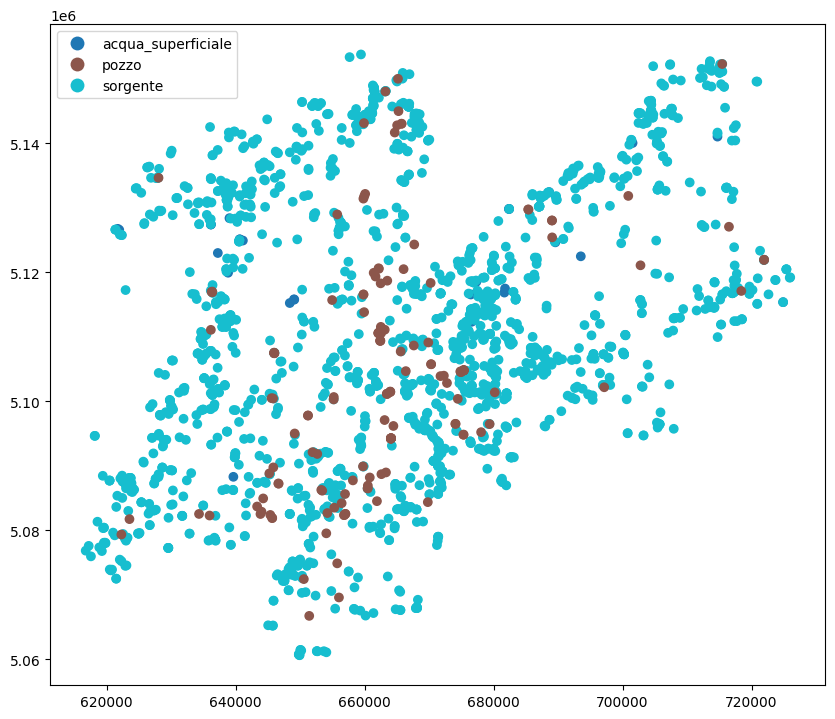

In [6]:
pup_all.plot(column='type', legend=True, figsize=(10, 10))

In [67]:
# to crs 4326
pup_all = pup_all.to_crs(epsg=4326)
# save as geojson?
pup_all.to_file('../data/water/carta_ris_idriche/pup_all.geojson', driver='GeoJSON')

# Derivazioni Idriche attive
Source: https://siat.provincia.tn.it/geonetwork/srv/ita/catalog.search#/metadata/p_TN:0ee6892f-280f-4119-924b-2c37dd71e275

In [ ]:
derivaz_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_0ee6892f-280f-4119-924b-2c37dd71e275.zip'
fun.download_and_unzip_shapefile(derivaz_url, extract_to='../data/water/derivazioni/')

Downloaded and extracted shapefile in ../data/water/derivazioni/


In [57]:
derivaz_path = '../data/water/derivazioni/pdi_derivazioni_v.shp'
derivaz_gdf = gpd.read_file(derivaz_path)
derivaz_gdf

,classid,objectid,numero_pra,stato_istr,stato_ist1,stato_oper,stato_ope1,attingimen,prelievo,restituzio,...,origine_p1,attend_pun,attend_pu1,desc_opera,idgdi,op_gedi_da,op_gedi_d1,datafine,dataagg,geometry
0,PDI001_1,1,C/13578,3,VALIDA-SCADUTA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CTP,CTP,1,None,2007-11-09 00:00:00,2009-11-08 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (658783 5135310)
1,PDI001_2,2,C/3161,3,VALIDA-SCADUTA,01,ATTIVO,SI,NO,SI,...,Domanda,DM_COR,Corografia,1,None,2005-10-27 00:00:00,2023-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (655281 5075917)
2,PDI001_3,3,C/1141,3,VALIDA-SCADUTA,01,ATTIVO,SI,NO,SI,...,Domanda,DM_COR,Corografia,1,None,2007-09-26 00:00:00,2019-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (637257 5111918)
3,PDI001_4,4,C/8793-2,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CTP,CTP,1,None,1999-01-01 00:00:00,2026-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (665427 5120465)
4,PDI001_5,5,C/10158,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CAT,Catastale,1,None,1999-01-01 00:00:00,2028-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (660923 5087318)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16901,PDI001_20937,20937,C/4066,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_COR,Corografia,1_D_POZ,None,2021-12-14 00:00:00,2030-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (652094 5091891)
16902,PDI001_20940,20940,C/16987,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_CAT,Catastale,1_D_POZ_107755,None,2023-10-24 00:00:00,2042-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (647640.183 5089895.418)
16903,PDI001_20941,20941,C/16987,2,VALIDA,01,ATTIVO,SI,SI,NO,...,Domanda,DM_CAT,Catastale,1_D_POZ_107755,None,2023-10-24 00:00:00,2042-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (647640.183 5089895.418)
16904,PDI001_20942,20942,C/5262,3,VALIDA-SCADUTA,01,ATTIVO,SI,SI,NO,...,Carta Tecnica,CT_CAT,Catastale,1-D-SOR-BUSA_DEI_CAVAI_ALTA,None,2023-09-25 00:00:00,2023-12-31 00:00:00,None,2024-01-17 16:00:16,MULTIPOINT (681842 5103814)


Aiutandomi con file descrizione dati (html), ci sono diverse colonne interessanti:
- 'stato_istr', 'stato_ist1', 'stato_oper', 'stato_ope1': stato/codice istruttoria E opera
- 'data_esec', 'data_sosp' : data inizio / sospensione esercizio
- 'op_gedi_da', 'op_gedi_d1': data inizio / fine sospensione
...


In [ ]:
derivaz_gdf.columns

In [62]:
# Descrizione stato istruttoria
print(derivaz_gdf.stato_ist1.unique())
# Codice stato istruttoria
print(derivaz_gdf.stato_istr.unique())

['VALIDA-SCADUTA' 'VALIDA']
['3' '2']


In [64]:
# Descrizione stato opera
print(derivaz_gdf.stato_ope1.unique())
# Codice stato opera
print(derivaz_gdf.stato_oper.unique())

['ATTIVO' 'RICHIESTO' 'SOCCORSO/SOTTESA' 'RICHIESTO ATTIVO']
['01' '05' '04' '03']


<Axes: >

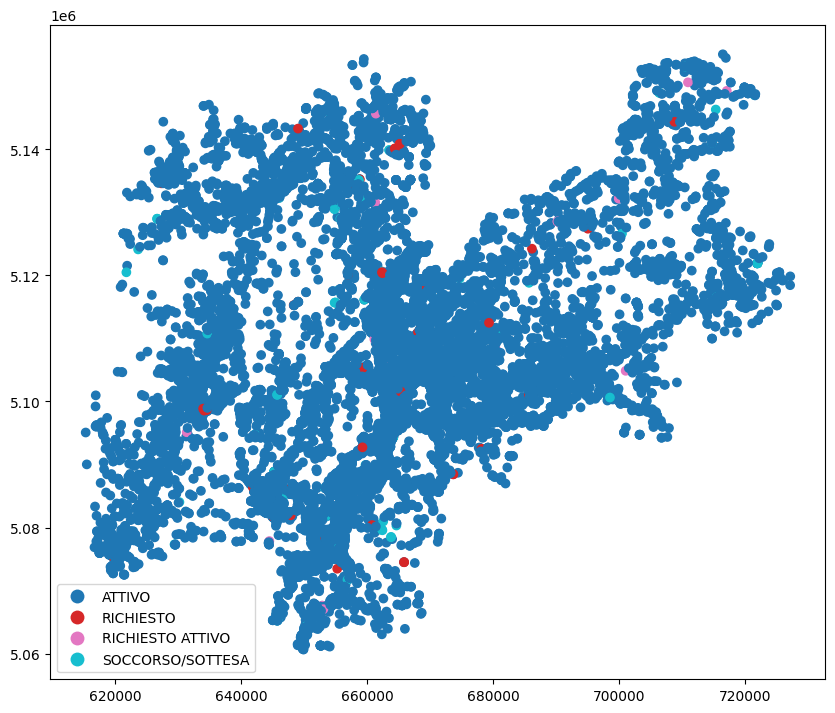

In [66]:
derivaz_gdf.plot(column='stato_ope1', legend=True, figsize=(10, 10))

In [68]:
derivaz_gdf = derivaz_gdf.to_crs(epsg=4326)
derivaz_gdf.to_file('../data/water/derivazioni/derivaz.geojson', driver='GeoJSON')

# Grandi derivazioni idroelettriche
(centrali, condotte, etc.)

In [4]:
grandiderivaz_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_7d4427f4-7002-41ca-9da5-cf7890b7fd6f.zip'
fun.download_and_unzip_shapefile(grandiderivaz_url, extract_to='../data/water/grandi_derivaz/')

Shapefile ready in ../data/water/grandi_derivaz/


In [ ]:
gdi_path = '../data/water/grandi_derivaz/gdi_impianti_v.shp'
gdi_gdf = gpd.read_file(gdi_path)

,classid,objectid,tipo,pratica,descrizion,dataagg,datafine,geometry
0,GDI002_291,1741,Centrale,GDI24SA,RIVA,2024-05-13 07:36:26,None,POINT (642633.452 5082681.103)
1,GDI002_292,1742,Centrale,GDI20AD,Traversa di Ala (DMV),2024-05-13 07:36:26,None,POINT (654218.000 5068109.000)
2,GDI002_293,1743,Opera di presa,GDI22SA-5D1,OPERA DI PRESA BACINO DI NEMBIA,2024-05-13 07:36:26,None,POINT (649493.377 5106948.736)
3,GDI002_294,1744,Opera di presa,GDI07AV-1D6,OPERA DI PRESA RIO VALON,2024-05-13 07:36:26,None,POINT (707605.572 5130889.894)
4,GDI002_295,1745,Centrale,GDI22SA,Ponte Pia' (DMV),2024-05-13 07:36:26,None,POINT (642830.109 5101428.353)
...,...,...,...,...,...,...,...,...
285,GDI002_576,2026,Opera di presa,GDI26CH-2D11,OPERA DI PRESA T. CAMPIELLO,2024-05-13 07:36:26,None,POINT (621641.737 5085663.126)
286,GDI002_577,2027,Centrale,GDI23SA,TORBOLE,2024-05-13 07:36:26,None,POINT (646115.603 5082769.469)
287,GDI002_578,2028,Opera di presa,GDI01NO-1D1,OPERA PRESA LAGO CARESER,2024-05-13 07:36:26,None,POINT (630681.917 5142513.690)
288,GDI002_579,2029,Opera di presa,GDI02NO-2D5,OPERA DI PRESA RIO VEGAIA SUSSIDIARIA,2024-05-13 07:36:26,None,POINT (624410.921 5133633.946)


In [7]:
gdi_gdf.tipo.unique()

array(['Centrale', 'Opera di presa', 'Restituzione'], dtype=object)

In [ ]:
gdi_gdf.plot(column='tipo', legend=True, figsize=(8, 8))

,classid,objectid,tipo,pratica,descrizion,dataagg,datafine,geometry
2,GDI002_293,1743,Opera di presa,GDI22SA-5D1,OPERA DI PRESA BACINO DI NEMBIA,2024-05-13 07:36:26,None,POINT (649493.377 5106948.736)
3,GDI002_294,1744,Opera di presa,GDI07AV-1D6,OPERA DI PRESA RIO VALON,2024-05-13 07:36:26,None,POINT (707605.572 5130889.894)
5,GDI002_296,1746,Opera di presa,GDI19AD-1D2,OPERA DI PRESA BACINO SPECCHERI,2024-05-13 07:36:26,None,POINT (666033.226 5070270.496)
10,GDI002_301,1751,Opera di presa,GDI22SA-1D3,OPERA DI PRESA RIO FINALE,2024-05-13 07:36:26,None,POINT (631212.668 5100979.634)
11,GDI002_302,1752,Opera di presa,GDI16BR-3D9,BARCHI A,2024-05-13 07:36:26,None,POINT (699824.205 5106092.237)
...,...,...,...,...,...,...,...,...
284,GDI002_575,2025,Opera di presa,GDI18AD-3D3,OPERA DI PRESA DAL LAGO DI PRADASTUA,2024-05-13 07:36:26,None,POINT (647974.840 5070503.657)
285,GDI002_576,2026,Opera di presa,GDI26CH-2D11,OPERA DI PRESA T. CAMPIELLO,2024-05-13 07:36:26,None,POINT (621641.737 5085663.126)
287,GDI002_578,2028,Opera di presa,GDI01NO-1D1,OPERA PRESA LAGO CARESER,2024-05-13 07:36:26,None,POINT (630681.917 5142513.690)
288,GDI002_579,2029,Opera di presa,GDI02NO-2D5,OPERA DI PRESA RIO VEGAIA SUSSIDIARIA,2024-05-13 07:36:26,None,POINT (624410.921 5133633.946)


# Corpi idrici sotterranei

In [30]:
corpisott_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_e701c6e4-4d6f-475f-ae08-8d37eba35248.zip'
fun.download_and_unzip_shapefile(corpisott_url, extract_to='../data/water/corpi_sott/')

Shapefile ready in ../data/water/corpi_sott/


In [32]:
cis_path = '../data/water/corpi_sott/cis_pta2022_v.shp'
cis_gdf = gpd.read_file(cis_path)

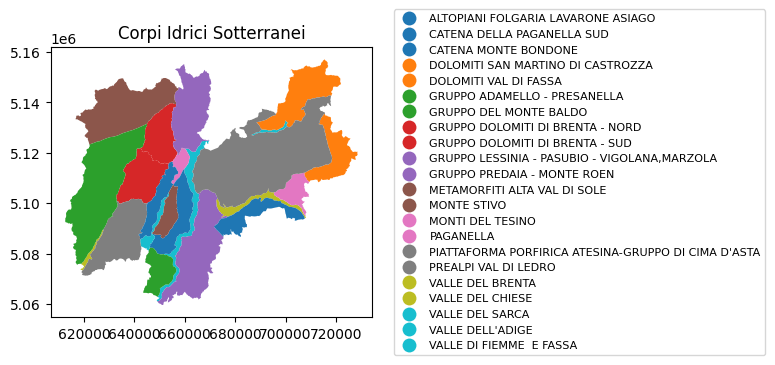

In [33]:
ax = cis_gdf.plot(
    column='idronimo', 
    legend=True, 
    figsize=(8, 10),
    legend_kwds={'bbox_to_anchor': (1.05, 0.5), 'loc': 'center left', 'fontsize':8}
)

# Adjust layout to avoid cutting off the legend
plt.title('Corpi Idrici Sotterranei')
plt.tight_layout()
plt.show()

# Corpi idrici fluviali

In [34]:
corpifluv_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_df06e63c-d0f3-46c9-8ec2-c25a22c50ef7.zip'
fun.download_and_unzip_shapefile(corpifluv_url, extract_to='../data/water/corpi_fluv/')

Shapefile ready in ../data/water/corpi_fluv/


In [2]:
cif_path = '../data/water/corpi_fluv/cif_pta2022_v.shp'
cif_gdf = gpd.read_file(cif_path)
cif_gdf.head(5)

,objectid,classid,codice_pat,codice_eu,idronimo,inizio,fine,tipologia,tipo_monit,sito_qual,...,inquinanti,esenzioni,mot_esen,misure,competenza,commenti,note,dataagg,datafine,geometry
0,2263,APP003_A000000000011IR,A000000000011IR,ITARW02AD00100160TN,FIUME ADIGE,CONFINE PROVINCIALE,CONFLUENZA FOSSA DI CALDARO,02SS4F,Rete nucleo - Analisi tendenze,11SG0001,...,None,None,None,Intervento riqualificazione morfologica,Trento,Il corpo idrico presenta pressione morfologica...,None,2023-03-22 09:00:00,None,"LINESTRING (667768.371 5122101.917, 667741.274..."
1,2264,APP003_A000000000021tn,A000000000021tn,ITARW02AD00100150TN,FIUME ADIGE,CONFLUENZA FOSSA DI CALDARO,CONFLUENZA FIUME NOCE,02SS4F,Indagine,11SD0167,...,None,Deroga per non fattibilita' tecnica - Mantenim...,Approfondimento sulle effettive cause dello sc...,Ulteriori indagini ambientali; Realizzazione c...,Trento,Il corpo idrico non raggiunge gli obiettivi di...,None,2023-03-22 09:00:00,None,"LINESTRING (663547.804 5117190.188, 663531.943..."
2,2265,APP003_A000000000031tn,A000000000031tn,ITARW02AD00100140TN,FIUME ADIGE,CONFLUENZA FIUME NOCE,CAMBIO TIPOLOGIA - CONFLUENZA TORR. AVISIO,02SS4F,Operativo,11SD0159,...,None,Deroga per non fattibilita' tecnica - Mantenim...,Approfondimento sulle effettive cause dello sc...,Ulteriori indagini ambientali,Trento,Il corpo idrico non raggiunge gli obiettivi di...,None,2023-03-22 09:00:00,None,"LINESTRING (660329.665 5112323.725, 660310.270..."
3,2266,APP003_A000000000041tn,A000000000041tn,ITARW02AD00100131TN,FIUME ADIGE,CAMBIO TIPOLOGIA - CONFLUENZA TORR. AVISIO,CONFLUENZA CON TORR. FERSINA,02SS5F,Rete nucleo - Analisi tendenze,12SG0002,...,None,None,None,Realizzazione collettore fognario Trento 3; Ve...,Trento,Rischio di mantenimento degli obiettivi di qua...,None,2023-03-22 09:00:00,None,"LINESTRING (660862.883 5109949.476, 660881.322..."
4,2267,APP003_A000000000051tn,A000000000051tn,ITARW02AD00100121TN,FIUME ADIGE,CONFLUENZA CON TORR. FERSINA,CONFLUENZA RIO MOLINI,02SS5F,Accorpato al corpo idrico A000000000041tn,None,...,None,None,None,Realizzazione depuratore Trento 3; Misure comp...,Trento,Rischio di mantenimento degli obiettivi di qua...,None,2023-03-22 09:00:00,None,"LINESTRING (663815.784 5101032.726, 663854.704..."


<Axes: >

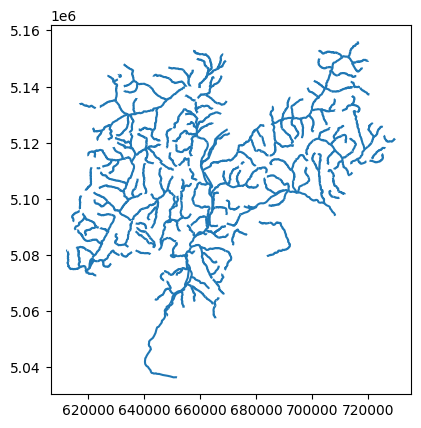

In [10]:
cif_gdf.plot()

# Corpi idrici lacustri

In [11]:
corpilaghi_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_6137f8f2-cb30-4eb3-b533-181bd02619b8.zip'
fun.download_and_unzip_shapefile(corpilaghi_url, extract_to='../data/water/corpi_laghi/')

Shapefile ready in ../data/water/corpi_laghi/


In [12]:
cil_path = '../data/water/corpi_laghi/cil_pta2022_v.shp'
cil_gdf = gpd.read_file(cil_path)
cil_gdf.head(5)

,objectid,classid,codice_pat,codice_eu,idronimo,tipologia,sito_qual,designazio,aree_prot,area,...,ele_peg,obiettivi,esenzioni,misure,competenza,note,commenti,dataagg,datafine,geometry
0,85,APP005_A0A201000000120tn,A0A201000000120tn,ITALW02AD1700TN,LAGO DI TERLAGO,AL-5,None,NATURALE,naturalistiche,0.210457,...,None,Obiettivo sconosciuto,None,Ulteriori indagini ambientali; Riduzione dotaz...,Trento,None,Non in rete di monitoraggio per dimensioni inf...,2022-12-22 09:00:00,None,"POLYGON ((658879.749 5106681.816, 658881.160 5..."
1,86,APP005_A10000000000413tn,A10000000000413tn,ITALW02AD0500TN,LAGO DI FEDAIA,AL-1,None,FORTEMENTE MODIFICATO,None,0.599431,...,None,Mantenimento qualita' attuale,None,None,Trento,None,Non monitorato per difficolta' di accesso,2022-12-22 09:00:00,None,"POLYGON ((719962.656 5148986.500, 719962.635 5..."
2,87,APP005_A10000000091112tn,A10000000091112tn,ITALW02AD0400TN,LAGO DI STRAMENTIZZO,AL-6,None,FORTEMENTE MODIFICATO,None,0.644528,...,None,Obiettivi meno rigorosi raggiunti,Deroga per non fattibilita' tecnica - Mantenim...,Ulteriori indagini ambientali,Trento,None,Non monitorato per difficolta' di accesso; pro...,2022-12-22 09:00:00,None,"POLYGON ((683304.875 5125761.860, 683304.198 5..."
3,88,APP005_A15300000000910tn,A15300000000910tn,ITALW02AD0600TN,LAGO DI FORTE BUSO O DI PANEVEGGIO,AL-10,None,FORTEMENTE MODIFICATO,None,0.832558,...,None,Mantenimento qualita' attuale,None,None,Trento,None,Non monitorato per difficolta' di accesso,2022-12-22 09:00:00,None,"POLYGON ((709066.089 5131117.727, 709066.466 5..."
4,89,APP005_A20200000000616tn,A20200000000616tn,ITALW02AD0300TN,LAGO DELLA SERRAIA,AL-8,74LN1200,NATURALE,naturalistiche,0.451653,...,LTLeco e IPAM,Obiettivi raggiungibili oltre il 2027,Proroga,Miglioramento sistema ossigenazione; Accordo d...,Trento,None,Il lago non ha raggiunto gli obiettivi di qual...,2022-12-22 09:00:00,None,"POLYGON ((674366.403 5111421.860, 674361.376 5..."


In [ ]:
cil_gdf.plot(column='idronimo', legend=True)

21

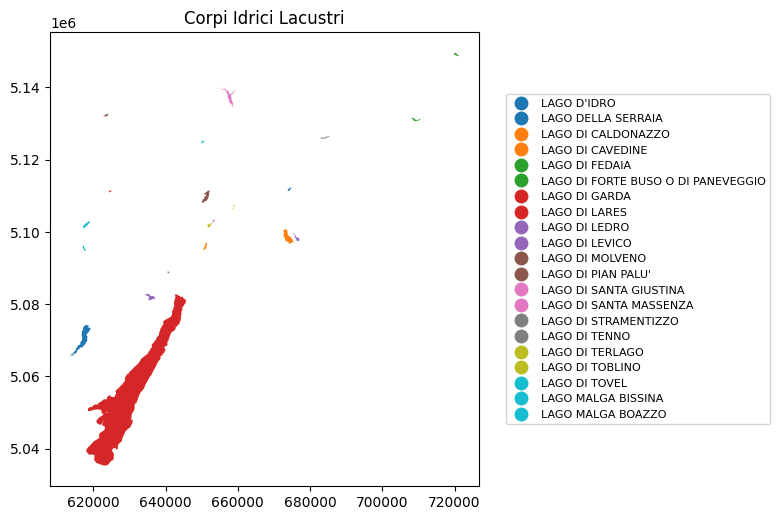

In [14]:
ax = cil_gdf.plot(
    column='idronimo', 
    legend=True, 
    figsize=(8, 10),
    legend_kwds={'bbox_to_anchor': (1.05, 0.5), 'loc': 'center left', 'fontsize':8}
)

# Adjust layout to avoid cutting off the legend
plt.title('Corpi Idrici Lacustri')
plt.tight_layout()
plt.show()

# Ghiacciai
Source: [Geocatalogo PAT Ghiacciai 2015](https://siat.provincia.tn.it/geonetwork/srv/ita/catalog.search#/metadata/p_TN:4b5b287f-cdce-4c9f-99f4-434b123d3d49) 

In [3]:
glaciers_url = 'https://siatservices.provincia.tn.it/idt/vector/p_TN_4b5b287f-cdce-4c9f-99f4-434b123d3d49.zip'
fun.download_and_unzip_shapefile(glaciers_url, extract_to='../data/water/glaciers2015/')

Shapefile ready in ../data/water/glaciers2015/


In [4]:
glaciers_path = '../data/water/glaciers2015/Ghi_2015.shp'
glaciers_gdf = gpd.read_file(glaciers_path)
glaciers_gdf

,AREA,PERIMETER,OBJECTID,NOME,CODICE,COD_PEG,geometry
0,30722.265185,1345.432696,29,Ghiacciaio di Val del Vescovo,630.1,TNADA27,"POLYGON ((621968.668 5100092.642, 621966.088 5..."
1,25854.322604,1413.440885,103,Ghiacciaio Settentrionale di Cima Bissina I,627.0,TNADA20a,"POLYGON ((620532.982 5100616.240, 620532.241 5..."
2,12760.440759,705.805388,181,Ghiacciaio Settentrionale di Cima Bissina II,627.0,TNADA20b,"POLYGON ((620565.072 5100609.510, 620566.795 5..."
3,45643.878078,2417.122001,27,Ghiacciaio di Cima Danerba,626.0,TNADA19,"POLYGON ((621161.989 5100772.483, 621160.137 5..."
4,46872.782761,1617.827527,102,Ghiacciaio del Cop di Breguzzo,625.1,TNADA16,"POLYGON ((621814.831 5102402.001, 621813.138 5..."
...,...,...,...,...,...,...,...
144,10482.585261,447.246885,2,Ghiacciaio di Vernel inf 2,943.2,TNMAR02a2,"POLYGON ((717379.741 5147630.683, 717378.468 5..."
145,30892.954316,870.303302,147,Sassoni di Sternai,711.0,TNCEV37,"POLYGON ((636485.056 5147664.468, 636486.772 5..."
146,18725.628841,629.527636,1,Ghiacciaio di Vernel inf 1,943.1,TNMAR02a1,"POLYGON ((717556.826 5147846.095, 717556.205 5..."
147,122066.827203,2151.812702,126,Sternai,710,TNCEV34a,"POLYGON ((635676.903 5148493.035, 635676.268 5..."
